# 000 Testing the vanilla `stellarflow` class

In [37]:
## Imports
import numpy as np
import matplotlib.pyplot as plt

## Sys-Path
import sys
if "..\\" not in sys.path: sys.path.append("..\\")

In [38]:
## Import custom modules
from importlib import reload  
from system import nBodySystem as nbs
nbs = reload(nbs)
nBodySystem = nbs.nBodySystem

In [39]:
## Settings
AU, ED = nBodySystem._AU, nBodySystem._ED
print(30300./AU*ED)

0.017499714319129007


In [40]:
import tensorflow as tf
print("Num GPUs Available: ", len(tf.config.list_physical_devices('GPU')))

Num GPUs Available:  1


## Random Stars Initializations

In [41]:
## For Planet-System scale:
mean  = 0
std_x = 10.
std_v = 0.05

## For Interstellar-System scale:
# mean = 0
# std_x = 1000.
# std_v = 1.

In [42]:
N_init = 1000
X0 = np.random.normal(size=(N_init, 3), loc=mean, scale=std_x)
V0 = np.random.normal(size=(N_init, 3), loc=mean, scale=std_v)
M0 = np.random.chisquare(df=1, size=N_init)

## Appending large gravitational center
# X0 = np.concatenate([X0, [3*[0.]]], axis=0)
# V0 = np.concatenate([V0, [3*[0.]]], axis=0)
# M0 = np.concatenate([M0, [1e9]], axis=0)

In [43]:
system = nBodySystem(X0, V0, M0, dt=1., smooth=1e-3)

In [44]:
system.simulation(500)

100%|██████████| 500/500 [00:02<00:00, 240.15it/s]


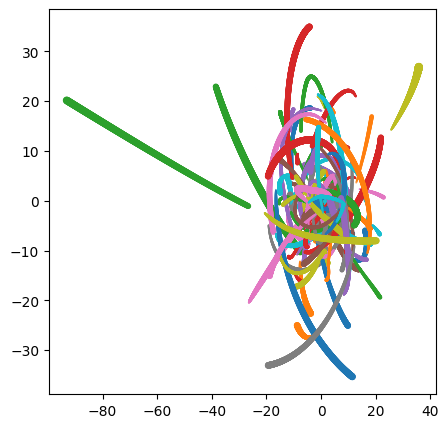

In [45]:
system.plot_history_2d(ZSIZE=True, n_sample=100)

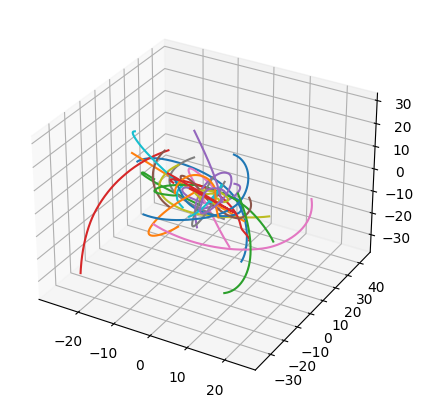

In [46]:
system.plot_history_3d()

## 2 Suns

In [47]:
X = np.array([
    [-1., 0., 0.], # Sun 
    [ 1., 0., 0.], # Sun 2
    [ 0., 0., 0.]  # Poor Planet
])

V = np.array([
    [0., -0.01, 0.], # Sun 
    [0.,  0.01, 0.], # Sun 2
    [ 0., 0.001, 0.001]   # Poor Planet
])

M = np.array([
    1.,  # Sun
    1.,  # Sun2
    1e-5 # Poor Planet
])

In [48]:
S2_system = nBodySystem(X, V, M, dt=1)

In [49]:
S2_system.step()

In [50]:
S2_system.simulation(3*365)

100%|██████████| 1095/1095 [00:01<00:00, 548.52it/s]


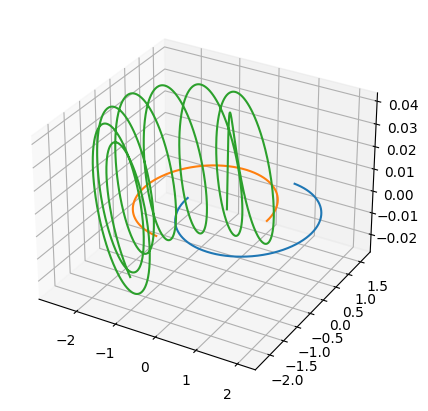

In [51]:
S2_system.plot_history_3d()

## Sun-Earth-Mars

In [52]:
X = np.array([
    [0., 0.,    0.], # Sun 
    [1., 0.,    0.], # Earth
    [0., 1.524, 0.]  # Mars
])

V = np.array([
    [0.,           0., 0.], # Sun 
    [0., 29290./AU*ED, 0.],  # Earth
    [27070./AU*ED, 0., 0.],  # Mars
])

M = np.array([
    1.,                # Sun
    3.0025e-6,         # Earth
    0.107 * 3.0025e-6  # Mars
])

In [53]:
SEM_system = nBodySystem(X, V, M)

In [54]:
SEM_system.simulation(3*365)

100%|██████████| 1095/1095 [00:02<00:00, 492.80it/s]


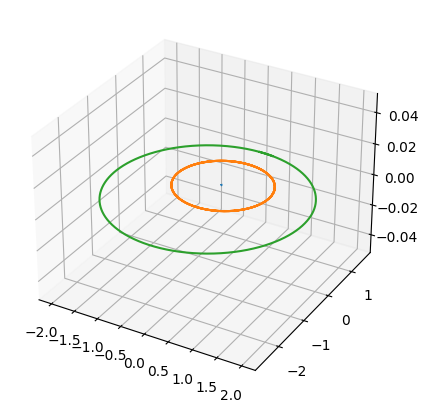

In [55]:
SEM_system.plot_history_3d()

## Earth Moon

In [69]:
X = np.array([
    [0., 0.,  0.], # Earth
    [383397000./AU, 0., 0.]  # Moon
])

V = np.array([
    [0., 0.,          0.], # Earth
    [0., 1023./AU*ED, 0.]  # Moon
])

M = np.array([
    3.0025e-6,         # Earth
    3.0025e-6 / 81.3   # Moon
])

In [70]:
EMo_system = nBodySystem(X, V, M, dt=1.)

In [71]:
EMo_system.simulation(300)

100%|██████████| 300/300 [00:01<00:00, 292.73it/s]


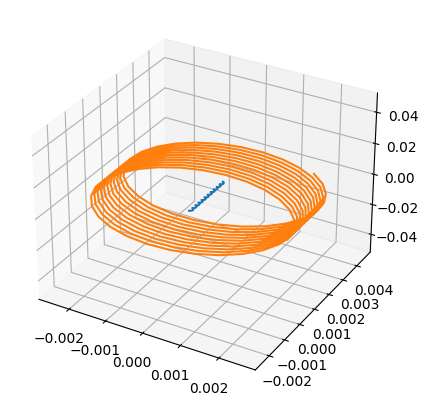

In [72]:
EMo_system.plot_history_3d()

In [73]:
x_earth = EMo_system._Q_hist[:, 0, :]
x_moon  = EMo_system._Q_hist[:, 1, :]
x_diff = x_moon - x_earth

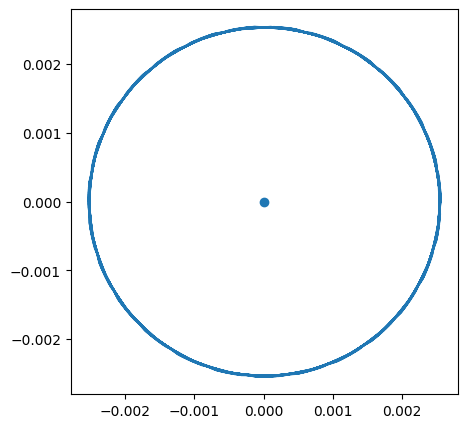

In [74]:
plt.figure(figsize=(5, 5))
plt.plot(x_diff[:, 0], x_diff[:, 1])
plt.scatter(0, 0)
plt.show()

## Sun Earth Moon

In [31]:
## Ecliptic tilt
sigma = 5. * np.pi / 180.

X = np.array([
    [0., 0.,    0.], # Sun 
    [1., 0.,    0.], # Earth
    [1. + 383397000./AU, 0., 0.]  # Moon
])

V = np.array([
    [0.,                     0., 0.], # Sun 
    [0.,           29290./AU*ED, 0.], # Earth
    [0., 29290./AU*ED + 1023.*np.cos(sigma)/AU*ED, 1023.*np.sin(sigma)/AU*ED]  # Moon  
])

M = np.array([
    1.,                # Sun
    3.0025e-6,         # Earth
    3.0025e-6 / 81.3   # Moon
])

In [32]:
SEMo_system = nBodySystem(X, V, M, dt=1., smooth=0.)

In [35]:
SEMo_system.simulation(2*365, algo="rk4")

100%|██████████| 730/730 [00:01<00:00, 495.83it/s]


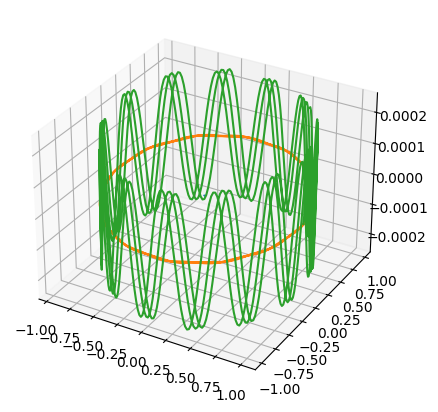

In [36]:
SEMo_system.plot_history_3d()

Relative coordinate Earth - Moon

In [95]:
x_earth = SEMo_system._Q_hist[:, 1, :]
x_moon  = SEMo_system._Q_hist[:, 2, :]
x_diff = x_moon - x_earth

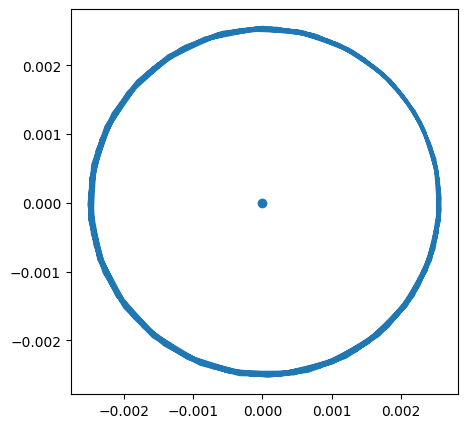

In [96]:
plt.figure(figsize=(5, 5))
plt.plot(x_diff[:, 0], x_diff[:, 1])
plt.scatter(0, 0)
plt.show()

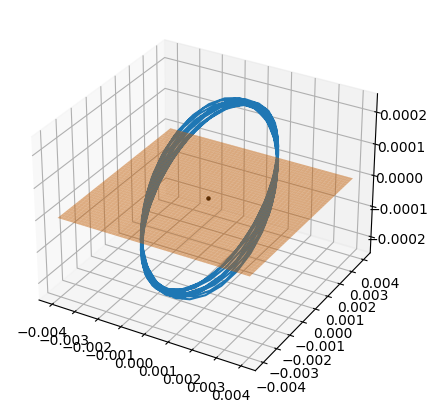

In [97]:
fig = plt.figure(figsize=(5, 5))
ax = fig.add_subplot(111, projection='3d')
ax.plot(
    x_diff[:, 0], 
    x_diff[:, 1], 
    x_diff[:, 2]
)
## Ecliptic Plane
xx, yy = np.meshgrid(
    np.linspace(-0.004, 0.004), 
    np.linspace(-0.004, 0.004)
)
z = xx-xx

# plot the plane
ax.plot_surface(xx, yy, z, alpha=0.5)
ax.scatter(0, 0, 0, color="black", s=5)
plt.show()

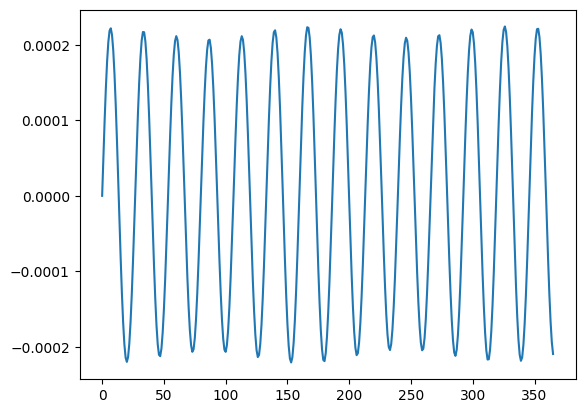

In [98]:
plt.plot(x_diff[:, 2])